# Imports

In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
from pprint import pprint
import pickle as pk
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [486]:
data = pd.read_csv("/Users/snouto/Downloads/dataset_diabetes/diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [487]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [488]:
data.sample(n=5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101017,433762196,92419686,Caucasian,Male,[80-90),?,2,1,7,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
35242,109428522,23765319,Caucasian,Male,[60-70),?,3,1,1,1,...,No,No,No,No,No,No,No,No,Yes,>30
47918,146840934,52520760,AfricanAmerican,Female,[80-90),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
27461,89970210,6623361,Caucasian,Female,[20-30),?,3,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
7929,36686064,24690132,Caucasian,Female,[90-100),?,5,3,17,4,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [489]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [490]:
# Checking nulls
print(data.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [491]:
# Investigate unique values in weight column
data["weight"].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [492]:
# number of records whose weight is missing
data[data['weight']=='?']['weight'].count()

98569

In [493]:
data.shape

(101766, 50)

In [494]:
# no. of records with weight 
data.shape[0] - data[data['weight']=='?']['weight'].count()

3197

In [495]:
data.drop("weight",inplace=True,axis=1)

In [496]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [497]:
# payer_code column, > 52% have missing values
data[data["payer_code"] == '?']['payer_code'].count()

40256

In [498]:
data.drop("payer_code",inplace=True,axis=1)

In [499]:
# medical_specialty has missing > 53% missing values
data.drop("medical_specialty",axis=1,inplace=True)

In [500]:
# cleaning trailing spaces fr
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [501]:
# removing commas if present
data["diag_1"]=data["diag_1"].str.replace(',','')
data["diag_2"]=data["diag_2"].str.replace(',','')
data["diag_3"]=data["diag_3"].str.replace(',','')

In [502]:
data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [503]:
data.isnull()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [504]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [505]:
# Checking duplicate data
duplicate = data[data.duplicated()]
print('number of duplicate rows:' , duplicate.shape)

number of duplicate rows: (0, 47)


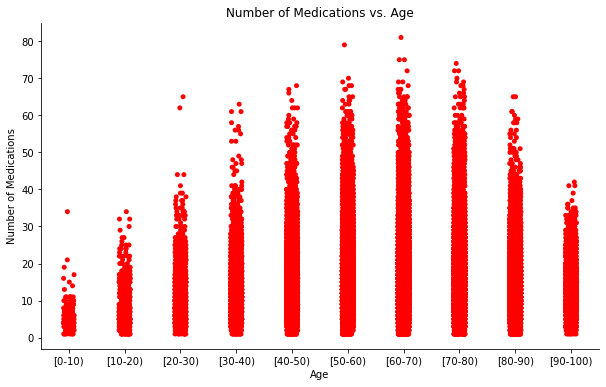

In [506]:

#Let's try to see how the age and number of medicines vary,
sortage = data.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

In [507]:
data.shape

(101766, 47)

In [508]:
# Transforming readmitted column into binary column, where No equals 0 and any thing else is 1
data['readmit'] = np.where(data['readmitted'] == 'NO',0,1)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


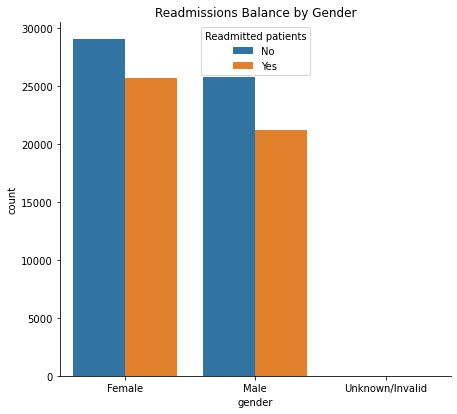

In [509]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

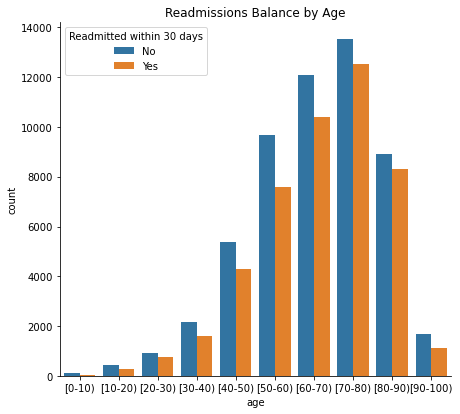

In [510]:

#Relation between age and readmission,

b = data.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'readmit', data = data, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

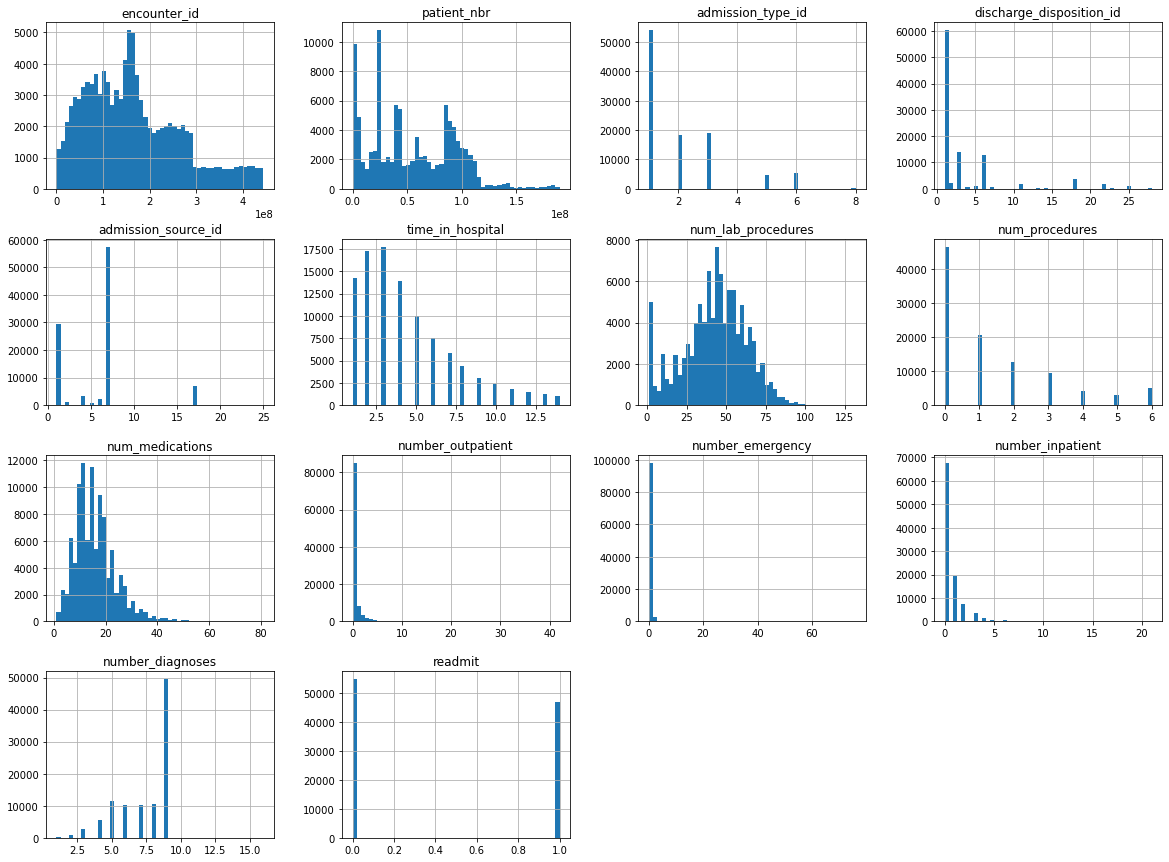

In [511]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:title={'center':'Frequencies Of Categorical Features'}, xlabel='age', ylabel='count'>

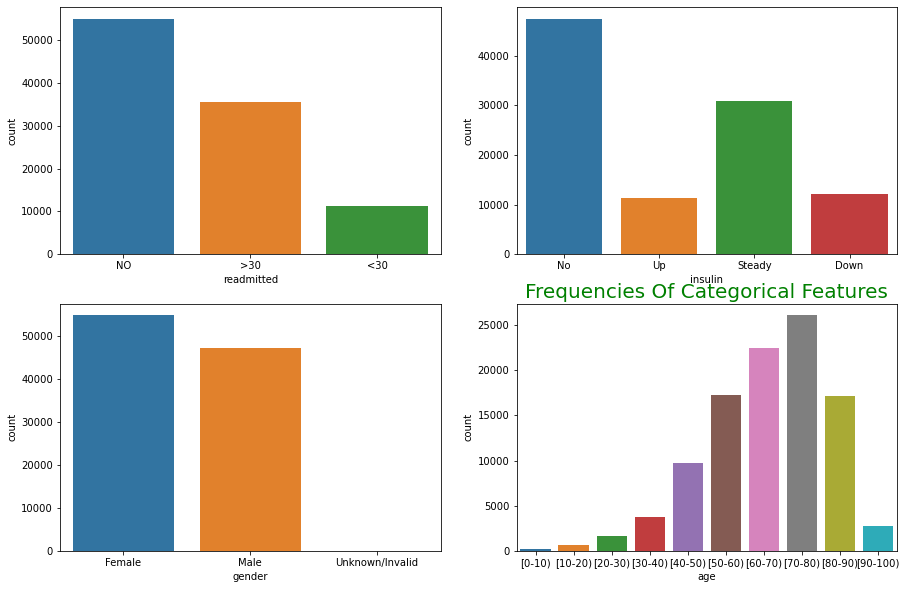

In [512]:
#Exploring the categorical variables,
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
#plt.title('Frequencies Of Categorical Features',c='g',size=20)
sns.countplot(x="readmitted", data=data, ax=ax[0][0])
sns.countplot(x="insulin", data=data, ax=ax[0][1])
sns.countplot(x="gender", data=data, ax=ax[1][0])
sns.countplot(x="age", data=data, ax=ax[1][1])



In [513]:
# Checking nulls
print(data.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [514]:
data.count()

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride                 101766
acetohexamide               101766
glipizide                   101766
glyburide           

In [515]:
data['metformin'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [516]:
data['metformin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['repaglinide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['nateglinide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['chlorpropamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glimepiride'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['acetohexamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glipizide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glyburide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['tolbutamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['pioglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['rosiglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['acarbose'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['miglitol'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['troglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['tolazamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['troglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['examide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['citoglipton'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glyburide-metformin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glipizide-metformin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glimepiride-pioglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['metformin-rosiglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['metformin-pioglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['gender'].replace({"Female":0,"Male":1},inplace=True)

data['insulin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)

<AxesSubplot:xlabel='num_lab_procedures'>

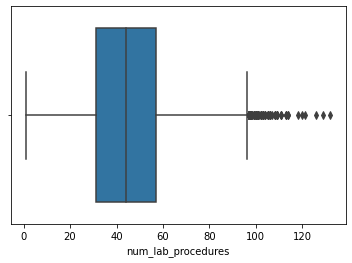

In [517]:
sns.boxplot(x=data['num_lab_procedures'])

In [518]:
# Encoding age column from age intervals to ordinal numerical values for classification
data['age'].replace({"[0-10)":1,"[10-20)":2,"[20-30)":3,"[30-40)":4,"[40-50)":5,"[50-60)":6,"[60-70)":7,
                    "[70-80)":8,"[80-90)":9,"[90-100)":10},inplace=True)
data.head(n=20)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,0,1,6,25,1,1,41,...,0,0,0,0,0,0,No,No,NO,0
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,3,0,0,0,0,0,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,No,Yes,NO,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,3,0,0,0,0,0,Ch,Yes,NO,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,0,0,Ch,Yes,NO,0
5,35754,82637451,Caucasian,1,6,2,1,2,3,31,...,1,0,0,0,0,0,No,Yes,>30,1
6,55842,84259809,Caucasian,1,7,3,1,2,4,70,...,1,0,0,0,0,0,Ch,Yes,NO,0
7,63768,114882984,Caucasian,1,8,1,1,7,5,73,...,0,0,0,0,0,0,No,Yes,>30,1
8,12522,48330783,Caucasian,0,9,2,1,4,13,68,...,1,0,0,0,0,0,Ch,Yes,NO,0
9,15738,63555939,Caucasian,0,10,3,3,4,12,33,...,1,0,0,0,0,0,Ch,Yes,NO,0


In [519]:
data['diabetesMed'].replace({"No":0,"Yes":1},inplace=True)
data['change'].replace({"No":0,"Ch":1},inplace=True)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,0,1,6,25,1,1,41,...,0,0,0,0,0,0,0,0,NO,0
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,3,0,0,0,0,0,1,1,>30,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,0,1,NO,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,3,0,0,0,0,0,1,1,NO,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,0,0,1,1,NO,0


In [520]:
data['readmitted'].replace({"NO":0,">30":2,"<30":1},inplace=True)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,0,1,6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,3,0,0,0,0,0,1,1,2,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,0,1,0,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,3,0,0,0,0,0,1,1,0,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,0,0,1,1,0,0


In [521]:
# Removing Dead patients
data = data[((data.discharge_disposition_id != 11) & 
                                          (data.discharge_disposition_id != 13) &
                                          (data.discharge_disposition_id != 14) & 
                                          (data.discharge_disposition_id != 19) & 
                                          (data.discharge_disposition_id != 20) & 
                                          (data.discharge_disposition_id != 21))]

In [522]:
data.drop(['readmitted','race','patient_nbr','encounter_id','max_glu_serum','A1Cresult','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [523]:
# Change the type of columns [readmitted and diabetesMed] from object into int
data['diabetesMed'] = data['diabetesMed'].astype(int)
data.dtypes

gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose                     int64
miglitol                     int64
troglitazone                 int64
tolazamide                   int64
examide             

In [524]:
# Adding a new combined column that represents the diabetes/disease degree
# that will act as our new target variable

data['ddegree'] = data['readmit'] & data['diabetesMed']
data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmit,ddegree
0,0,1,6,25,1,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,1,7,3,59,0,18,0,...,3,0,0,0,0,0,1,1,1,1
2,0,3,1,1,7,2,11,5,13,2,...,0,0,0,0,0,0,0,1,0,0
3,1,4,1,1,7,2,44,1,16,0,...,3,0,0,0,0,0,1,1,0,0
4,1,5,1,1,7,1,51,0,8,0,...,1,0,0,0,0,0,1,1,0,0


In [525]:
# Check the class imbalance if exists
data['diabetesMed'].value_counts()

1    76719
0    22624
Name: diabetesMed, dtype: int64

In [526]:
# check the class imbalance if exists
data['readmit'].value_counts()

0    52527
1    46816
Name: readmit, dtype: int64

In [527]:
data['ddegree'].value_counts()

0    61979
1    37364
Name: ddegree, dtype: int64

0    0.623889
1    0.376111
Name: ddegree, dtype: float64


Text(0.5, 1.0, 'Bar Chart')

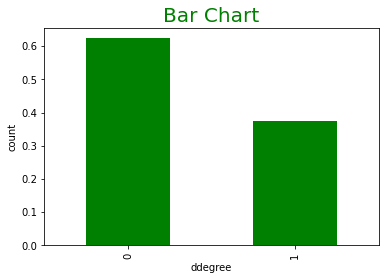

In [528]:
target_c = data.ddegree.value_counts(normalize=True) 
print(target_c)

target_c.plot(kind='bar',color='g')
plt.xlabel('ddegree')
plt.ylabel('count')
plt.title('Bar Chart',c='g',size=20)

In [529]:
# Normalizing using Standard Scaler (Z-Score)
target_name = "ddegree"

data.drop(data.index[data['gender'] == 'Unknown/Invalid'],inplace=True)
XF = data.drop([target_name,'diabetesMed','readmit'],axis=1)
# Perform Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(XF)
Y = data[target_name]

In [530]:
# transform the scaled matrix back into DataFrame for visualizing
df = pd.DataFrame(X,columns=XF.columns)
df.head(n=20)

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,-0.926510,-3.809535,2.744602,4.143900,-1.163853,-1.138455,-0.097257,-0.783548,-1.850433,-0.291867,...,-0.018978,0.0,0.0,-0.868476,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
1,-0.926510,-3.182390,-0.712311,-0.485670,0.312148,-0.464686,0.820652,-0.783548,0.249657,-0.291867,...,-0.018978,0.0,0.0,2.111779,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
2,-0.926510,-2.555246,-0.712311,-0.485670,0.312148,-0.801570,-1.627106,2.152858,-0.368016,1.288969,...,-0.018978,0.0,0.0,-0.868476,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
3,1.079319,-1.928101,-0.712311,-0.485670,0.312148,-0.801570,0.055727,-0.196267,0.002588,-0.291867,...,-0.018978,0.0,0.0,2.111779,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
4,1.079319,-1.300956,-0.712311,-0.485670,0.312148,-1.138455,0.412692,-0.783548,-0.985690,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
5,1.079319,-0.673811,-0.020928,-0.485670,-0.917852,-0.464686,-0.607207,2.740140,0.002588,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
6,1.079319,-0.046667,0.670455,-0.485670,-0.917852,-0.127802,1.381596,-0.196267,0.620261,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
7,1.079319,0.580478,-0.712311,-0.485670,0.312148,0.209083,1.534581,-0.783548,-0.491551,-0.291867,...,-0.018978,0.0,0.0,-0.868476,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
8,-0.926510,1.207623,-0.020928,-0.485670,-0.425852,2.904157,1.279606,0.391014,1.485004,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
9,-0.926510,1.834768,0.670455,-0.099873,-0.425852,2.567273,-0.505217,0.978296,0.249657,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219


## Pickling 

In [531]:
def save_to_file(data,file):
    with open(file,"wb") as writer:
        pk.dump(data,writer)
    print(f"Data was pickled Successfully To : {file}")

In [532]:
save_to_file(XF,"files/processed.data.bin")

Data was pickled Successfully To : files/processed.data.bin


In [533]:
data.shape

(99340, 40)

# split data

In [534]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [535]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=0)

In [536]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(80465, 37)
(8941, 37)
(9934, 37)


In [537]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(80465,)
(8941,)
(9934,)


## Model#1 (KNN)

In [538]:
#Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [539]:
knn.predict(X_val)

array([0, 0, 1, ..., 0, 1, 1])

In [540]:
y_test.head()

31754    1
70005    1
32231    0
72589    1
97880    0
Name: ddegree, dtype: int64

In [541]:
knn.score(X_train,y_train)

0.8244702665755297

In [542]:
knn.score(X_val,y_val)

0.6655855049770719

In [543]:
# Print the model accuracy
y_pred = knn.predict(X_test)
accur = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accur}")

Accuracy : 0.6588483994362795


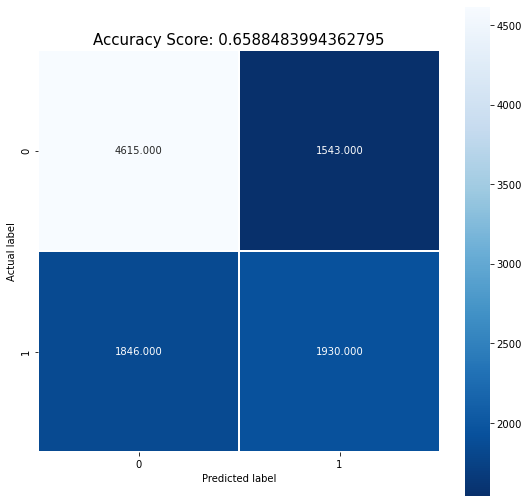

In [544]:
# Plotting Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [545]:
# Checking the summary of classification
print(classification_report(y_test, y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.71      0.75      0.73      6158
         YES       0.56      0.51      0.53      3776

    accuracy                           0.66      9934
   macro avg       0.64      0.63      0.63      9934
weighted avg       0.65      0.66      0.66      9934



In [546]:
save_to_file(knn,"files/knn.model")

Data was pickled Successfully To : files/knn.model


## Model #2 (Logistic Regression)


In [548]:
models_dict = {'Model':[],
              'Accuracy':[],
              'Recall':[],
              'Precision':[],
              'F1 score':[],}

In [549]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

print("\nLogistic Regression Accuracy=",accuracy_score(y_val, y_pred))
print("Logistic Regression F1 score=",f1_score(y_val, y_pred))


Logistic Regression Accuracy= 0.6645789061626216
Logistic Regression F1 score= 0.4353229147053285


In [550]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
f1_score(lr.predict(X_val), y_val)

0.4353229147053285

In [551]:
y_pred_proba = lr.predict_proba(X_val)[::,1]
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_val, y_pred_proba)
lr_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Logistic Regression ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))
models_dict

{'Model': ['Logistic Regression '],
 'Accuracy': [0.6645789061626216],
 'Recall': [0.3447658813003281],
 'Precision': [0.5903983656792645],
 'F1 score': [0.4353229147053285]}

<AxesSubplot:>

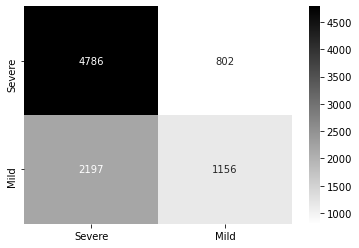

In [552]:
cm = confusion_matrix(y_val, y_pred)
class_label = ["Severe", "Mild"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

In [553]:
save_to_file(lr,"files/logistic.model")

Data was pickled Successfully To : files/logistic.model


## Model #3 (Decision Trees)

In [554]:
# trying with entropy, since it didn't show in the previose step
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : list(range(5,20)),
             'max_features': ['auto', 'sqrt', 'log2']}

decision_tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=8,
                                     max_features='auto',
                                     random_state=42)

decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

DT Accuracy= 0.6661447265406554
DT F1 score= 0.5304388862671071


In [555]:
# stroring the best models in the dict
y_pred_proba = decision_tree.predict_proba(X_val)[::,1]
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_val, y_pred_proba)
dt_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Decision Tree")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))
models_dict

{'Model': ['Logistic Regression ', 'Decision Tree'],
 'Accuracy': [0.6645789061626216, 0.6661447265406554],
 'Recall': [0.3447658813003281, 0.5028332836266031],
 'Precision': [0.5903983656792645, 0.5612516644474035],
 'F1 score': [0.4353229147053285, 0.5304388862671071]}

<AxesSubplot:>

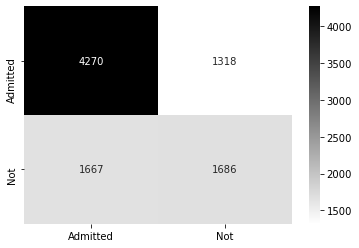

In [556]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["Admitted", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

In [557]:
save_to_file(decision_tree,"files/decision.tree.model")

Data was pickled Successfully To : files/decision.tree.model


## Model 4 (Random Forest)

In [558]:
rfc = RandomForestClassifier(n_estimators=50)

In [559]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

0.9999254334182563

In [560]:
rfc.score(X_val,y_val)

0.6967900682250308

In [561]:
y_pred = rfc.predict(X_val)

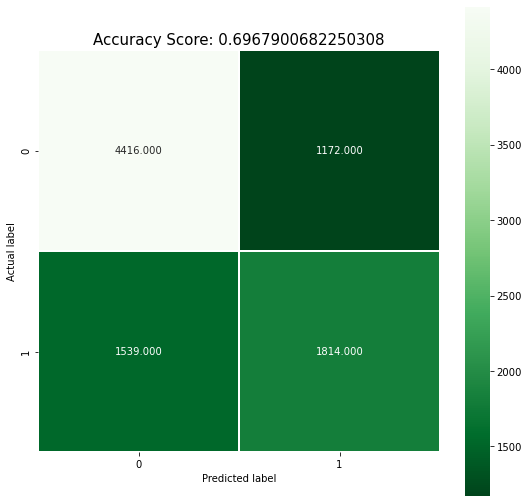

In [562]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_val, y_val))
plt.title(all_sample_title, size = 15);

In [563]:
y_pred_proba = rfc.predict_proba(X_val)[::,1]
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_val, y_pred_proba)
rfc_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("RandomForestClassifier ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))
models_dict

{'Model': ['Logistic Regression ', 'Decision Tree', 'RandomForestClassifier '],
 'Accuracy': [0.6645789061626216, 0.6661447265406554, 0.6967900682250308],
 'Recall': [0.3447658813003281, 0.5028332836266031, 0.5410080524903071],
 'Precision': [0.5903983656792645, 0.5612516644474035, 0.607501674480911],
 'F1 score': [0.4353229147053285, 0.5304388862671071, 0.5723300205079666]}

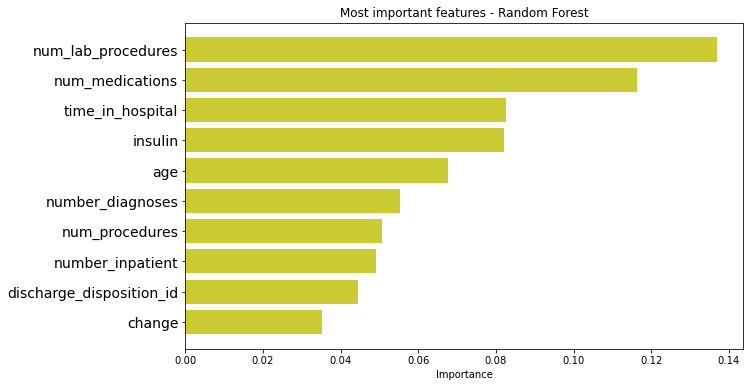

In [564]:
#Determining which features are most important,
feature_names = XF.columns
feature_imports = rfc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8,color='y')
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()


In [567]:
save_to_file(rfc,"files/random.forest.model")

Data was pickled Successfully To : files/random.forest.model


## Model (5) AdaBoost

In [568]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclassifier = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclassifier.fit(X_train, y_train)
y_ada = adaclassifier.predict(X_val)
print(adaclassifier.score(X_train,y_train))

0.674815137016094


In [569]:
print("The accurary of AdaBoosted Classification model: ", adaclassifier.score(X_val, y_val))

The accurary of AdaBoosted Classification model:  0.6745330499944078


In [570]:
print(confusion_matrix(y_val, y_ada))

[[5083  505]
 [2405  948]]


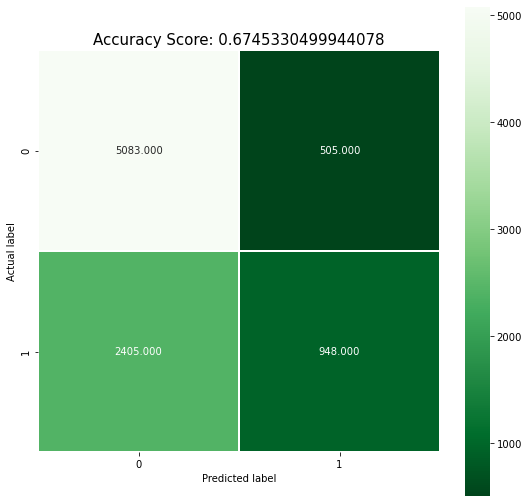

In [571]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_val, y_ada), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclassifier.score(X_val, y_val))
plt.title(all_sample_title, size = 15);

In [572]:
#Checking recall, f1 :-
print(classification_report(y_val, y_ada, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.68      0.91      0.78      5588
         YES       0.65      0.28      0.39      3353

    accuracy                           0.67      8941
   macro avg       0.67      0.60      0.59      8941
weighted avg       0.67      0.67      0.63      8941



## Model #6 (Gradient Boosting Machines)

In [573]:
import xgboost as xgb

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]

In [574]:
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

0.7015300986510973

In [575]:
gbm.get_booster().feature_names=list(XF.columns)

In [576]:
print("The accurary of AdaBoosted Classification model: ", gbm.score(X_train, y_train))

The accurary of AdaBoosted Classification model:  0.710470390853166


In [577]:
print("The accurary of AdaBoosted Classification model: ", gbm.score(X_val, y_val))

The accurary of AdaBoosted Classification model:  0.7017112179845655


In [578]:
y_pred = fit_model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [579]:
y_pred_proba = gbm.predict_proba(X_val)[::,1]
gbm_fpr, gbm_tpr, gbm_threshold = roc_curve(y_val, y_pred_proba)
gbm_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Gradient Boosting Machines ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))
models_dict

{'Model': ['Logistic Regression ',
  'Decision Tree',
  'RandomForestClassifier ',
  'Gradient Boosting Machines '],
 'Accuracy': [0.6645789061626216,
  0.6661447265406554,
  0.6967900682250308,
  0.7017112179845655],
 'Recall': [0.3447658813003281,
  0.5028332836266031,
  0.5410080524903071,
  0.475096928124068],
 'Precision': [0.5903983656792645,
  0.5612516644474035,
  0.607501674480911,
  0.6372],
 'F1 score': [0.4353229147053285,
  0.5304388862671071,
  0.5723300205079666,
  0.5443362378267556]}

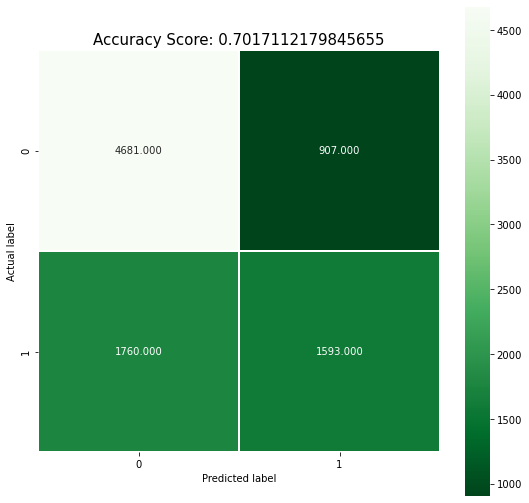

In [580]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gbm.score(X_val, y_val))
plt.title(all_sample_title, size = 15);

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

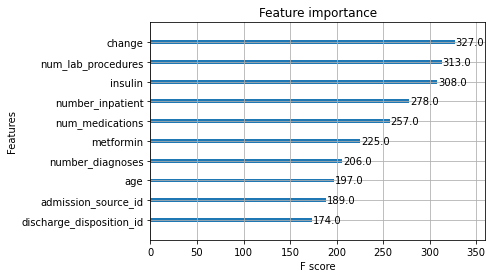

In [581]:
xgb.plot_importance(gbm,max_num_features=10)

## Model #7 (Naive Bayes , Bernoulli, Gaussian,Dummy)

In [582]:
# Bernoulli Naive Bayes
naive_bayes_bernoulli = BernoulliNB()
naive_bayes_bernoulli.fit(X_train,y_train)
naive_bayes_bernoulli.score(X_train,y_train)

0.6607717641210464

In [583]:
naive_bayes_bernoulli.score(X_val,y_val)

0.6634604630354547

In [584]:
# Gaussian Naive Bayes
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train,y_train)
naive_bayes_gaussian.score(X_val,y_val)

0.6363941393580137

In [585]:
# Dummy Classifier
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train,y_train)
dummy_classifier.score(X_val,y_val)

0.6249860194609104

## More efficient multiple parameters tuning using `GridSearchCV`

In [586]:
#Sampling from Data To select The Best Hyperparemeters For Each Model
def evaluate_with_sampling(x_train,y_train,model,params,sample_size=20000,n_samples=10,**kwargs):
    """
    x_train: The predictors n-dimensional array
    y_train: the target variable 1-dimensional array
    model_settings: is a tuple in the form of (model,params),where params is a dictionary of model expected parameters
    sample_size: is the size of the sample to be taken from the input data in each iteration. defaults to 20,000
    n_samples: the total number of samples to take before calculating the best parameters
    **kwargs: are additional key=value parameters to be passed for GridSearchCV algorithm
    """
    from collections import defaultdict
    from scipy import stats
    # Take a sample with replacement from the training data
    final_params = defaultdict(list)
    for i in range(n_samples):
        # try GridSearchCV on one sample
        xdf = pd.DataFrame(x_train)
        X = xdf.sample(n=sample_size)
        Y = y_train.iloc[X.index]
        print(f"Working on {i+1}th Sample (X:{X.shape[0]}, Y: {Y.shape[0]})")
        print("="*15)
        gs = GridSearchCV(model,params,**kwargs)
        gs.fit(X,Y)
        best_params = gs.best_params_
        for k , v in best_params.items():
            final_params[k].append(v)
    print(final_params)
    results = { k : list(stats.mode(v).mode) for k,v in final_params.items()}
    return results


In [587]:
params = {"n_neighbors":list(range(1,5)),"weights":['uniform','distance']}
results = evaluate_with_sampling(X_train,y_train,knn,params
                                 ,n_samples=3,cv=10,scoring='accuracy')

Working on 1th Sample (X:20000, Y: 20000)
Working on 2th Sample (X:20000, Y: 20000)
Working on 3th Sample (X:20000, Y: 20000)
defaultdict(<class 'list'>, {'n_neighbors': [4, 3, 4], 'weights': ['uniform', 'distance', 'uniform']})


In [588]:
def evaluate_models_params(models,params_list):
    results = {}
    for index,model in enumerate(models):
        print(f"Working on {index+1} model")
        params = params_list[index]
        best_params = evaluate_with_sampling(X_train,y_train,model,params,n_samples=3,cv=10,scoring='accuracy')
        results[model] = best_params
    return results
        
        

In [ ]:
models = [gbm]
params_list = [
               {"n_estimators":list(range(10000,30000,1000)),
"max_depth":list(range(5,20,2)),
"learning_rate":np.arange(0.05,0.5,0.01)}]
results = evaluate_models_params(models,params_list)
results

Working on 1 model
Working on 1th Sample (X:20000, Y: 20000)
[12:30:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost

[13:13:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

## Using the best parameters to make predictions

In [ ]:
X = data[['change','num_lab_procedures','insulin','number_inpatient'
          ,'num_medications','age','time_in_hospital','number_diagnoses'
          ,'num_procedures','admission_type_id','discharge_disposition_id']]
Y = data['ddegree']
# splitting the new data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=0)
# Training the best baseline model from above (XG Boost)
gbm = xgb.XGBClassifier(
                        n_estimators=3000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05,
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )
eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit(
                    X_train, y_train,
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
output = f"XG Boost After Feature Engineering: {accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))}"
print(output)

In [303]:
X.shape

(99340, 11)

## Random Forrest with only 10 columns

In [290]:
rfc = RandomForestClassifier(n_estimators=50)

rfc.fit(X_train,y_train)
train_score = rfc.score(X_train,y_train)

validation_score = rfc.score(X_val,y_val)

y_pred = rfc.predict(X_val)

In [292]:
accuracy_score(y_val,y_pred)

0.6702829661111732

## More efficient multiple parameters tuning using `RandomizedSearchCV`

# XGBoost Classifier


In [471]:
# Applying XGboost Classifier after choosing the best hyperparameters using RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
         'objective': ['binary:logistic']}

xgbc = xgb.XGBClassifier(seed = 20)

rs = RandomizedSearchCV(estimator=xgbc, 
                   param_distributions=params,
                   cv = 5,
                   scoring='f1', 
                   verbose=1,
                    n_iter=25)

rs.fit(X_val, y_val, eval_metric= 'logloss')
rs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.8999999999999999,
 'objective': 'binary:logistic',
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.3,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.7999999999999999}

In [472]:
xgbc = xgb.XGBClassifier(subsample=0.6,
                         objective='binary:logistic',
                         n_estimators=1000,
                         max_depth=3,
                        learning_rate=0.2,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.4
                        )

xgbc.fit(X_train,y_train,eval_metric= 'logloss')
y_pred = xgbc.predict(X_val)

print("xgbc Accuracy=",accuracy_score(y_val, y_pred))
print("xgbc F1 score=",f1_score(y_val, y_pred))

xgbc Accuracy= 0.6847108824516274
xgbc F1 score= 0.5056987550412064


In [473]:
# stroring the best models in the dict
y_pred_proba = xgbc.predict_proba(X_val)[::,1]
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_val, y_pred_proba)
xgb_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("XGBoost Classifier ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

# Ensembling with staking

In [474]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
 
estimators = [
     ('rf', RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=True)),
    ('xgb', xgb.XGBClassifier(subsample=0.7,
                         objective='binary:logistic',
                         n_estimators=100,
                         max_depth=3,
                        learning_rate=0.1,
                        colsample_bytree=0.79,
                        colsample_bylevel=0.79
                        ))
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print("SC Accuracy=",accuracy_score(y_val, y_pred))
print("SC F1 score=",f1_score(y_val, y_pred))

[11:50:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:54:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [475]:
models_dict['Model'].append("StackingClassifier")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

# Evaluating


In [476]:
# conver the dict into dataframe for visualizations
result = pd.DataFrame.from_dict(models_dict)
result

,Model,Accuracy,Recall,Precision,F1 score
0,Logistic Regression,0.664579,0.344766,0.590398,0.435323
1,Decision Tree,0.666145,0.502833,0.561252,0.530439
2,Logistic Regression,0.691757,0.535043,0.599799,0.565574
3,RandomForestClassifier,0.691757,0.535043,0.599799,0.565574
4,Gradient Boosting Machines,0.701711,0.475097,0.637200,0.544336
5,Gradient Boosting Machines,0.701711,0.475097,0.637200,0.544336
6,XGBoost Classifier,0.684711,0.430063,0.613617,0.505699
7,StackingClassifier,0.683928,0.394274,0.624469,0.483364


In [477]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=True)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)


print("RF Accuracy=",accuracy_score(y_test, y_pred))
print("RF F1 score=",f1_score(y_test, y_pred))

RF Accuracy= 0.6856251258304812
RF F1 score= 0.4814876307487963


## Comparing Models

In [467]:
fpr_log, tpr_log, thresholds = roc_curve(y_test, lr.predict(X_test))#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rfc.predict(X_test))#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(y_test, adaclassifier.predict(X_test))#Ada boost classifier
fpr_adamod, tpr_adamod, thresholds = roc_curve(y_test,knn.predict(X_test) )#Hyperparameters Tunning for AdaBoosted
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,decision_tree.predict(X_test))
fpr_xg,tpr_xg,thresholds = roc_curve(y_test,gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

Text(0.5, 1.0, 'Models Accuracies')

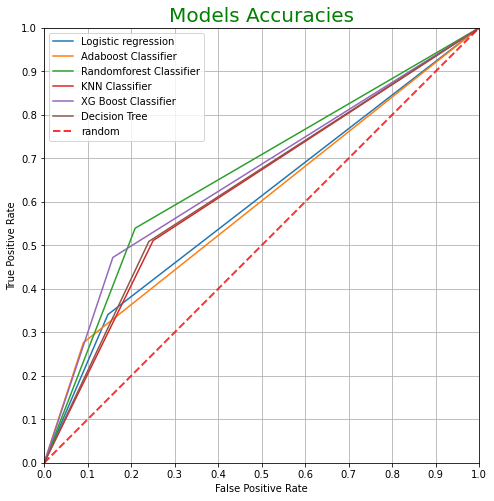

In [468]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot(fpr_adamod, tpr_adamod, label='KNN Classifier')
plt.plot(fpr_xg,tpr_xg,label='XG Boost Classifier')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Models Accuracies',c='g',size=20)

In [469]:
print("Accuracy of KNN Classification model: ", knn.score(X_test, y_test)*100)
print(" Accuracy of Logistic regression model:" ,lr.score(X_test, y_test)*100)
print("Accuracy of Random forest classification: ", rfc.score(X_test, y_test)*100)
print("Accuracy of AdaBoosted Classification model: ", adaclassifier.score(X_test, y_test)*100)
print(" Accuracy of Gradient Boosting Machines:",accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))*100)
print( "Accuracy of Decision Tree ", accuracy_score(y_test,decision_tree.predict(X_test))*100)

Accuracy of KNN Classification model:  65.88483994362795
 Accuracy of Logistic regression model: 65.86470706663982
Accuracy of Random forest classification:  69.52889067847795
Accuracy of AdaBoosted Classification model:  66.90155023152809
 Accuracy of Gradient Boosting Machines: 70.15300986510972
Accuracy of Decision Tree  66.41836118381318


In [470]:
X = XF[['change','num_lab_procedures','insulin','number_inpatient'
          ,'num_medications','age','time_in_hospital','number_diagnoses'
          ,'num_procedures']]
Y = data['ddegree']
# splitting the new data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=0)
# Training the best baseline model from above (XG Boost)
gbm = xgb.XGBClassifier(
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05,
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )
eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit(
                    X_train, y_train,
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
output = f"XG Boost After Feature Engineering: {accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))}"
print(output)

XG Boost After Feature Engineering: 0.6847191463660157


In [314]:
save_to_file(gbm,"files/application.model.model")

Data was pickled Successfully To : files/application.model.model


In [327]:
X_val.iloc[1]

change                 0
num_lab_procedures    63
insulin                0
number_inpatient       0
num_medications       17
age                    8
time_in_hospital       4
number_diagnoses       6
num_procedures         1
Name: 58661, dtype: int64

In [329]:
gbm.predict(X_val)[1]

0